In [1]:
import pandas as pd

df_results = pd.read_csv('../resources/data/unprocessed/WNCAATourneyCompactResults.csv')

df_results = df_results.loc[df_results['Season'] >= 2003, ].reset_index(drop=True)

df_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,2003,138,3130,73,3330,72,A,0
1,2003,138,3160,84,3140,45,H,0
2,2003,138,3208,80,3150,61,H,0
3,2003,138,3261,86,3402,50,N,0
4,2003,138,3278,68,3408,48,N,0


In [2]:
df_results['WLoc'].unique()

array(['A', 'H', 'N'], dtype=object)

In [3]:
df_results['LLoc'] = df_results['WLoc'].map({'A': 'H', 
                                             'H': 'A', 
                                             'N': 'N'})

df_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,LLoc
0,2003,138,3130,73,3330,72,A,0,H
1,2003,138,3160,84,3140,45,H,0,A
2,2003,138,3208,80,3150,61,H,0,A
3,2003,138,3261,86,3402,50,N,0,N
4,2003,138,3278,68,3408,48,N,0,N
...,...,...,...,...,...,...,...,...,...
1196,2022,147,3163,91,3301,87,N,2,N
1197,2022,147,3257,62,3276,50,N,0,N
1198,2022,151,3163,63,3390,58,N,0,N
1199,2022,151,3376,72,3257,59,N,0,N


In [4]:
import numpy as np

df = pd.DataFrame({'winner': np.repeat(0, df_results.shape[0]), 
                   'season': df_results['Season'], 
                   'day_number': df_results['DayNum'], 
                   'team0': df_results['WTeamID'], 
                   'team1': df_results['LTeamID'], 
                   'team0_loc': df_results['WLoc']})

temp = pd.DataFrame({'winner': np.repeat(1, df_results.shape[0]), 
                     'season': df_results['Season'], 
                     'day_number': df_results['DayNum'], 
                     'team0': df_results['LTeamID'], 
                     'team1': df_results['WTeamID'], 
                     'team0_loc': df_results['LLoc']})

df = pd.concat([df, temp], axis=0).reset_index(drop=True)

df.shape

(2402, 6)

In [5]:
df

,winner,season,day_number,team0,team1,team0_loc
0,0,2003,138,3130,3330,A
1,0,2003,138,3160,3140,H
2,0,2003,138,3208,3150,H
3,0,2003,138,3261,3402,N
4,0,2003,138,3278,3408,N
...,...,...,...,...,...,...
2397,1,2022,147,3301,3163,N
2398,1,2022,147,3276,3257,N
2399,1,2022,151,3390,3163,N
2400,1,2022,151,3257,3376,N


In [6]:
df_reg = pd.read_csv('../resources/data/unprocessed/WRegularSeasonCompactResults.csv')

df_reg = df_reg.loc[(df_reg['Season'] >= 2003) & (df_reg['Season'] != 2020), ].reset_index(drop=True)

df_reg

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,2003,6,3256,85,3403,76,N,0
1,2003,6,3397,94,3328,68,H,0
2,2003,11,3161,76,3362,58,H,0
3,2003,11,3210,67,3150,57,H,0
4,2003,11,3243,71,3123,61,H,0
...,...,...,...,...,...,...,...,...
99608,2023,132,3179,89,3125,71,N,0
99609,2023,132,3221,66,3131,61,A,0
99610,2023,132,3235,61,3400,51,N,0
99611,2023,132,3284,80,3406,55,A,0


In [7]:
df_reg_reshape = pd.DataFrame({'season': df_reg['Season'], 
                               'team_id': df_reg['WTeamID'], 
                               'opponent_id': df_reg['LTeamID'], 
                               'result': np.repeat('win', df_reg.shape[0])})

temp =           pd.DataFrame({'season': df_reg['Season'], 
                               'team_id': df_reg['LTeamID'], 
                               'opponent_id': df_reg['WTeamID'], 
                               'result': np.repeat('loss', df_reg.shape[0])})

df_reg_reshape = pd.concat([df_reg_reshape, temp], axis=0).reset_index(drop=True)

df_reg_reshape

,season,team_id,opponent_id,result
0,2003,3256,3403,win
1,2003,3397,3328,win
2,2003,3161,3362,win
3,2003,3210,3150,win
4,2003,3243,3123,win
...,...,...,...,...
199221,2023,3125,3179,loss
199222,2023,3131,3221,loss
199223,2023,3400,3235,loss
199224,2023,3406,3284,loss


In [8]:
prev_matchups = np.array([
    (df_reg_reshape.loc[(df_reg_reshape['season'] == df.iloc[i, df.columns.get_loc('season')]) & 
                        (df_reg_reshape['team_id'] == df.iloc[i, df.columns.get_loc('team0')]) & 
                        (df_reg_reshape['opponent_id'] == df.iloc[i, df.columns.get_loc('team1')]), 
                        'result'] == 'win').mean()
    for i in range(df.shape[0])
])

prev_matchups

array([nan, nan, nan, ..., nan, nan,  0.])

In [9]:
def common_opponents(season, team0, team1, df_reg_reshape=df_reg_reshape):
    team0_opponents = set(df_reg_reshape.loc[(df_reg_reshape['season'] == season) & 
                                             (df_reg_reshape['team_id'] == team0), 'opponent_id'])
    team1_opponents = set(df_reg_reshape.loc[(df_reg_reshape['season'] == season) & 
                                             (df_reg_reshape['team_id'] == team1), 'opponent_id'])
    
    common_opps = team0_opponents.intersection(team1_opponents)
    
    team0_common_opps_win_pct = (df_reg_reshape.loc[(df_reg_reshape['season'] == season) & 
                                                    (df_reg_reshape['team_id'] == team0) & 
                                                    (df_reg_reshape['opponent_id'].isin(common_opps)), 
                                                    'result'] == 'win').mean()
    
    team1_common_opps_win_pct = (df_reg_reshape.loc[(df_reg_reshape['season'] == season) & 
                                                    (df_reg_reshape['team_id'] == team1) & 
                                                    (df_reg_reshape['opponent_id'].isin(common_opps)), 
                                                    'result'] == 'win').mean()
    
    return team1_common_opps_win_pct - team0_common_opps_win_pct

common_opponents(2003, 3256, 3403)

0.0

In [10]:
common_opps_win_pct_diff = np.array([
    common_opponents(df.iloc[i, df.columns.get_loc('season')], 
                     df.iloc[i, df.columns.get_loc('team0')], 
                     df.iloc[i, df.columns.get_loc('team1')])
    for i in range(df.shape[0])
])

common_opps_win_pct_diff

array([-0.16666667,  0.1       ,  0.05      , ..., -0.06666667,
        0.05714286,  0.33333333])

In [11]:
df['prev_matchups'] = prev_matchups
df['common_opps_win_pct_diff'] = common_opps_win_pct_diff

df.head()

,winner,season,day_number,team0,team1,team0_loc,prev_matchups,common_opps_win_pct_diff
0,0,2003,138,3130,3330,A,NaN,-0.166667
1,0,2003,138,3160,3140,H,NaN,0.100000
2,0,2003,138,3208,3150,H,NaN,0.050000
3,0,2003,138,3261,3402,N,1.0,-0.333333
4,0,2003,138,3278,3408,N,NaN,-0.500000


In [13]:
df_seeds = pd.read_csv('../resources/data/unprocessed/WNCAATourneySeeds.csv')

df_seeds = df_seeds.loc[df_seeds['Season'] >= 2003, ].reset_index(drop=True)
df_seeds['Seed'] = df_seeds['Seed'].str.extract('(\d+)').astype(int)
df_seeds

,Season,Seed,TeamID
0,2003,1,3163
1,2003,2,3345
2,2003,3,3243
3,2003,4,3435
4,2003,5,3130
...,...,...,...
1283,2023,12,3405
1284,2023,13,3387
1285,2023,14,3241
1286,2023,15,3436


In [14]:
team0_seed = df.merge(df_seeds, how='left', 
                      left_on=['season', 'team0'], 
                      right_on=['Season', 'TeamID'])['Seed']

team1_seed = df.merge(df_seeds, how='left', 
                      left_on=['season', 'team1'], 
                      right_on=['Season', 'TeamID'])['Seed']

df['seed_diff'] = team1_seed - team0_seed

df

,winner,season,day_number,team0,team1,team0_loc,prev_matchups,common_opps_win_pct_diff,seed_diff
0,0,2003,138,3130,3330,A,NaN,-0.166667,7
1,0,2003,138,3160,3140,H,NaN,0.100000,5
2,0,2003,138,3208,3150,H,NaN,0.050000,7
3,0,2003,138,3261,3402,N,1.0,-0.333333,15
4,0,2003,138,3278,3408,N,NaN,-0.500000,5
...,...,...,...,...,...,...,...,...,...
2397,1,2022,147,3301,3163,N,NaN,-0.250000,1
2398,1,2022,147,3276,3257,N,0.0,NaN,-2
2399,1,2022,151,3390,3163,N,NaN,-0.066667,1
2400,1,2022,151,3257,3376,N,NaN,0.057143,0


In [15]:
(df_reg['WLoc'] == 'H').sum()

55643

In [16]:
(df_reg['WLoc'] == 'A').sum()

35348

In [17]:
(df_reg['WLoc'] == 'N').sum()

8622

In [18]:
(df_reg['WLoc'] == 'H').sum()/((df_reg['WLoc'] == 'H').sum() + (df_reg['WLoc'] == 'A').sum())

0.6115220186611863

In [19]:
def new_rating(winner_rating, loser_rating, winner_location):
    if winner_location == 'H':
        winner_expected = 1/(1 + 10**((loser_rating - winner_rating - 40)/400))
    elif winner_location == 'A':
        winner_expected = 1/(1 + 10**((loser_rating - winner_rating + 40)/400))
    else:
        winner_expected = 1/(1 + 10**((loser_rating - winner_rating)/400))
        
    new_winner_rating = winner_rating + (20*(1 - winner_expected))
    new_loser_rating = loser_rating - (new_winner_rating - winner_rating)
    
    return (new_winner_rating, new_loser_rating)
    # return winner_expected

new_rating(1000, 1002, 'A')

(1011.2030029046381, 990.7969970953619)

In [20]:
def season_ratings_iter(ratings, data):
    # avoid overwriting issues
    ratings = ratings.copy()
    data = data.copy()
    
    for i in range(data.shape[0]):
        winner = data.iloc[i, data.columns.get_loc('WTeamID')]
        loser = data.iloc[i, data.columns.get_loc('LTeamID')]

        winner_rating = ratings[winner]
        loser_rating = ratings[loser]
        winner_location = data.iloc[i, data.columns.get_loc('WLoc')]

        new_winner_rating, new_loser_rating = new_rating(winner_rating, loser_rating, winner_location)

        ratings[winner] = new_winner_rating
        ratings[loser] = new_loser_rating
        
    return ratings

In [21]:
def get_ratings(data, season):
    
    data = data.loc[data['Season'] == season, :].copy()

    teams = set(data['WTeamID'])
    teams.update(data['LTeamID'])

    ratings = dict(zip(teams, [1000 for _ in range(len(teams))]))
    new_ordinal_ratings = sorted(ratings, key=ratings.get, reverse=True)

    for i in range(10):
        old_ordinal_ratings = new_ordinal_ratings

        ratings = season_ratings_iter(ratings, data)

        new_ordinal_ratings = sorted(ratings, key=ratings.get, reverse=True)

    temp = pd.DataFrame({'season': season, 
                         'team_id': new_ordinal_ratings, 
                         'ordinal_rating': [i+1 for i, v in enumerate(new_ordinal_ratings)]})
    
    temp['rating'] = temp['team_id'].map(ratings)
    
    return temp

# get_ratings(df_reg, 2022)

In [22]:
ordinal_ratings = []

for season in df['season'].unique():
    print(season)
    
    ordinal_ratings.append(get_ratings(df_reg, season))
    
df_ratings = pd.concat(ordinal_ratings)

df_ratings

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2021
2022


,season,team_id,ordinal_rating,rating
0,2003,3163,1,1771.553031
1,2003,3181,2,1765.324246
2,2003,3397,3,1720.205110
3,2003,3261,4,1675.588928
4,2003,3400,5,1591.254629
...,...,...,...,...
351,2022,3108,352,390.877506
352,2022,3419,353,375.987655
353,2022,3178,354,342.102795
354,2022,3175,355,306.765311


In [23]:
team0_ELO = df.merge(df_ratings, how='left', 
                     left_on=['season', 'team0'], 
                     right_on=['season', 'team_id'])['rating']

team1_ELO = df.merge(df_ratings, how='left', 
                     left_on=['season', 'team1'], 
                     right_on=['season', 'team_id'])['rating']

df['elo_diff'] = team1_ELO - team0_ELO

team0_ordinal_ELO = df.merge(df_ratings, how='left', 
                     left_on=['season', 'team0'], 
                     right_on=['season', 'team_id'])['ordinal_rating']

team1_ordinal_ELO = df.merge(df_ratings, how='left', 
                     left_on=['season', 'team1'], 
                     right_on=['season', 'team_id'])['ordinal_rating']

df['ordinal_elo_diff'] = team1_ordinal_ELO - team0_ordinal_ELO

df

,winner,season,day_number,team0,team1,team0_loc,prev_matchups,common_opps_win_pct_diff,seed_diff,elo_diff,ordinal_elo_diff
0,0,2003,138,3130,3330,A,NaN,-0.166667,7,-158.060436,29
1,0,2003,138,3160,3140,H,NaN,0.100000,5,-144.780011,31
2,0,2003,138,3208,3150,H,NaN,0.050000,7,-119.080929,22
3,0,2003,138,3261,3402,N,1.0,-0.333333,15,-700.819496,166
4,0,2003,138,3278,3408,N,NaN,-0.500000,5,-176.969005,36
...,...,...,...,...,...,...,...,...,...,...,...
2397,1,2022,147,3301,3163,N,NaN,-0.250000,1,-154.013876,7
2398,1,2022,147,3276,3257,N,0.0,NaN,-2,102.543038,-12
2399,1,2022,151,3390,3163,N,NaN,-0.066667,1,-172.747376,8
2400,1,2022,151,3257,3376,N,NaN,0.057143,0,194.134346,-6


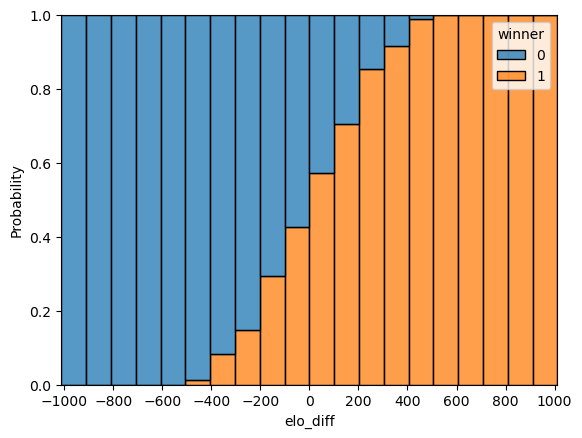

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

ax = sns.histplot(data=df, x='elo_diff', hue='winner', 
                  stat='probability', multiple='fill', bins=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(200))

plt.show()

In [25]:
def implied_odds(winner_rating, loser_rating, winner_location):
    if winner_location == 'H':
        winner_expected = 1/(1 + 10**((loser_rating - winner_rating - 40)/400))
    elif winner_location == 'A':
        winner_expected = 1/(1 + 10**((loser_rating - winner_rating + 40)/400))
    else:
        winner_expected = 1/(1 + 10**((loser_rating - winner_rating)/400))
        
    return winner_expected

implied_odds(1000, 1450, 'N')

0.06975828735890625

In [26]:
df.to_pickle('../resources/data/preprocessed/womens_tournament_games.pkl')

'Done'

'Done'